<a href="https://colab.research.google.com/github/vsquitiro/finalProjectCAP4770/blob/master/DecisionTreePlayground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
fileURL = 'https://cap4770dsprojectsum.s3.amazonaws.com/creditcard.csv'

In [ ]:
print('Can you see this?')

Can you see this?


In [ ]:
print('2nd change')

2nd change


In [3]:
import pandas as pd
import s3fs

df = pd.read_csv('https://cap4770dsprojectsum.s3.amazonaws.com/creditcard.csv')

In [4]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


In [5]:
#Test set will be same for all models
import numpy as np
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [6]:
test = np.unique(y_train, return_counts=True)
test[0][1]/test[1][0]

4.396705987873885e-06

In [7]:
test = np.unique(y_test, return_counts=True)
test[0][1]/test[1][0]

1.758334505556337e-05

In [8]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_under, y_train_under = nm.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [9]:
from collections import Counter
print(Counter(y_train_under))

Counter({0: 402, 1: 402})


In [10]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
print(Counter(y_train_over))

Counter({0: 227443, 1: 227443})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
# Decision Tree for set without over/undersampling
%%time
model_normal = DecisionTreeClassifier().fit(X_train,y_train)

CPU times: user 20.8 s, sys: 1.98 ms, total: 20.8 s
Wall time: 20.9 s


In [84]:
# Calculate accuracy for model without over/undersampling
%%time
model_normal.score(X_test, y_test)

CPU times: user 17.6 ms, sys: 994 µs, total: 18.6 ms
Wall time: 20.7 ms


0.9991573329588147

In [85]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix for model without over/undersampling
preds_normal = model_normal.predict(X_test)
confusion_matrix(y_test, preds_normal)

array([[56848,    24],
       [   24,    66]])

In [86]:
from sklearn.metrics import precision_score
# Calculate precision score for model without over/undersampling
precision_score(y_test, preds_normal)

0.7333333333333333

In [87]:
from sklearn.metrics import recall_score
# Calculate recall score for model without over/undersampling
recall_score(y_test, preds_normal)

0.7333333333333333

In [88]:
from sklearn.metrics import f1_score
# Calculate F1 Score for model without over/undersampling
f1_score(y_test, preds_normal)

0.7333333333333333

In [89]:
from sklearn.metrics import roc_auc_score
# Calculate ROC area under curve for model without over/undersampling
roc_auc_score(y_test, preds_normal)

0.8664556665259999

In [90]:
from sklearn.metrics import classification_report
# Generate classification report for model without over/undersampling
classification_report(y_test, preds_normal, output_dict=True)

{'0': {'f1-score': 0.9995779997186665,
  'precision': 0.9995779997186665,
  'recall': 0.9995779997186665,
  'support': 56872},
 '1': {'f1-score': 0.7333333333333333,
  'precision': 0.7333333333333333,
  'recall': 0.7333333333333333,
  'support': 90},
 'accuracy': 0.9991573329588147,
 'macro avg': {'f1-score': 0.8664556665259999,
  'precision': 0.8664556665259999,
  'recall': 0.8664556665259999,
  'support': 56962},
 'weighted avg': {'f1-score': 0.9991573329588147,
  'precision': 0.9991573329588147,
  'recall': 0.9991573329588147,
  'support': 56962}}

In [78]:
import matplotlib.pyplot as plt

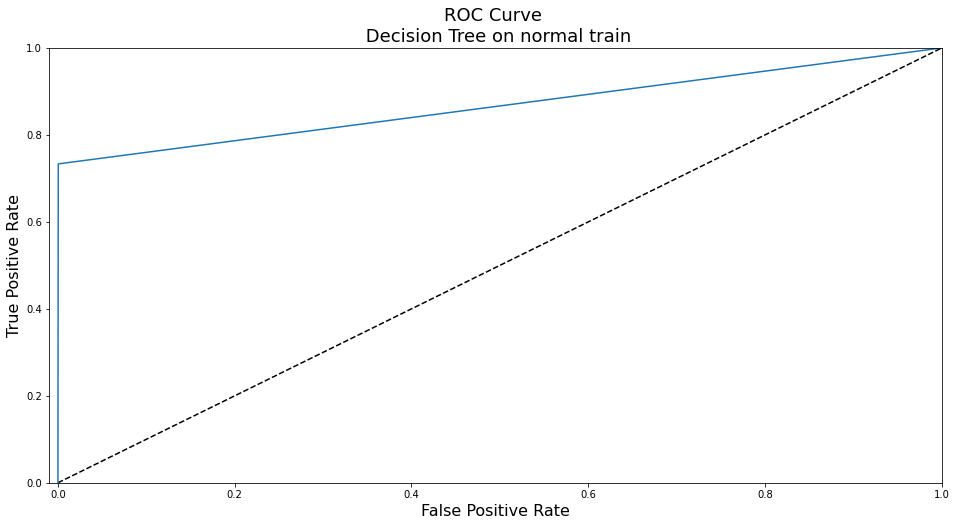

In [91]:
# Generate ROC Curve for model without over/undersampling
import sklearn.metrics as metrics
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Decision Tree on normal train', fontsize=18)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_normal)
plt.plot(fpr, tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, preds_normal)))

In [92]:
# Decision Tree for set with oversampling
%%time
model_over = DecisionTreeClassifier().fit(X_train_over,y_train_over)

CPU times: user 18.2 s, sys: 2.92 ms, total: 18.2 s
Wall time: 18.3 s


In [93]:
# Calculate accuracy for model with oversampling
%%time
model_over.score(X_test, y_test)

CPU times: user 17.5 ms, sys: 0 ns, total: 17.5 ms
Wall time: 17.7 ms


0.9991397773954567

In [94]:
# Generate confusion matrix for model with oversampling
preds_over = model_over.predict(X_test)
confusion_matrix(y_test, preds_over)

array([[56851,    21],
       [   28,    62]])

In [95]:
# Calculate precision score for model with oversampling
precision_score(y_test, preds_over)

0.7469879518072289

In [96]:
# Calculate recall score for model with oversampling
recall_score(y_test, preds_over)

0.6888888888888889

In [97]:
# Calculate F1 Score for model with oversampling
f1_score(y_test, preds_over)

0.7167630057803468

In [98]:
# Calculate ROC area under curve for model with oversampling
roc_auc_score(y_test, preds_over)

0.844259819321361

In [99]:
# Generate classification report for model with oversampling
classification_report(y_test, preds_over, output_dict=True)

{'0': {'f1-score': 0.9995692345561797,
  'precision': 0.9995077269290951,
  'recall': 0.9996307497538331,
  'support': 56872},
 '1': {'f1-score': 0.7167630057803468,
  'precision': 0.7469879518072289,
  'recall': 0.6888888888888889,
  'support': 90},
 'accuracy': 0.9991397773954567,
 'macro avg': {'f1-score': 0.8581661201682633,
  'precision': 0.873247839368162,
  'recall': 0.8442598193213611,
  'support': 56962},
 'weighted avg': {'f1-score': 0.999122400516121,
  'precision': 0.9991087455070775,
  'recall': 0.9991397773954567,
  'support': 56962}}

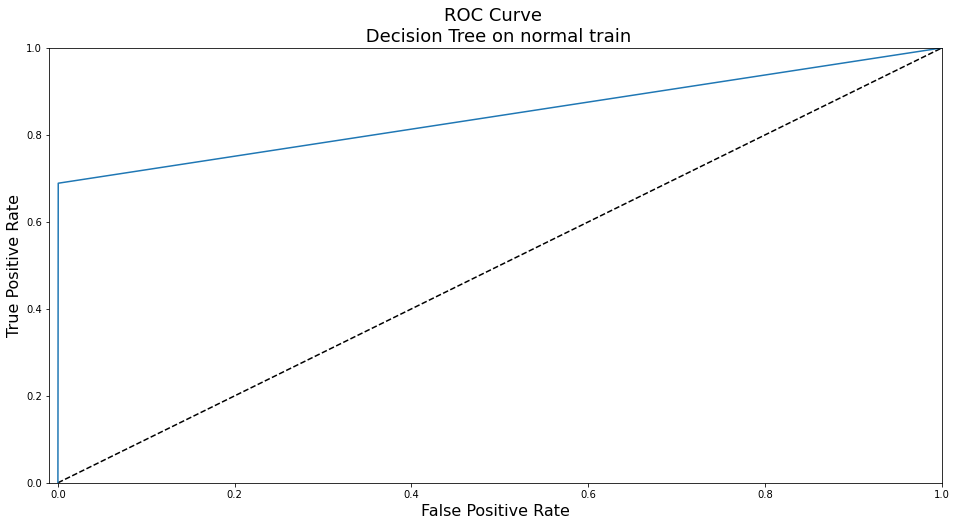

In [100]:
# Generate ROC Curve for model with oversampling
import sklearn.metrics as metrics
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Decision Tree on normal train', fontsize=18)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_over)
plt.plot(fpr, tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, preds_over)))

In [101]:
# Decision Tree for set with undersampling
%%time
model_under = DecisionTreeClassifier().fit(X_train_under,y_train_under)

CPU times: user 26.5 ms, sys: 0 ns, total: 26.5 ms
Wall time: 31.4 ms


In [102]:
# Calculate accuracy for model with undersampling
%%time
model_under.score(X_test, y_test)

CPU times: user 19.1 ms, sys: 1 ms, total: 20.1 ms
Wall time: 21.3 ms


0.308609248270777

In [103]:
# Generate confusion matrix for model with undersampling
preds_under = model_under.predict(X_test)
confusion_matrix(y_test, preds_under)

array([[17494, 39378],
       [    5,    85]])

In [104]:
# Calculate precision score for model with undersampling
precision_score(y_test, preds_under)

0.002153916326685756

In [105]:
# Calculate recall score for model with undersampling
recall_score(y_test, preds_under)

0.9444444444444444

In [106]:
# Calculate F1 Score for model with undersampling
f1_score(y_test, preds_under)

0.004298030490733952

In [107]:
# Calculate ROC area under curve for model with undersampling
roc_auc_score(y_test, preds_under)

0.626023741423235

In [108]:
# Generate classification report for model with undersampling
classification_report(y_test, preds_under, output_dict=True)

{'0': {'f1-score': 0.4704521923868174,
  'precision': 0.9997142693868221,
  'recall': 0.3076030384020256,
  'support': 56872},
 '1': {'f1-score': 0.004298030490733952,
  'precision': 0.002153916326685756,
  'recall': 0.9444444444444444,
  'support': 90},
 'accuracy': 0.308609248270777,
 'macro avg': {'f1-score': 0.23737511143877568,
  'precision': 0.5009340928567539,
  'recall': 0.626023741423235,
  'support': 56962},
 'weighted avg': {'f1-score': 0.46971566848367763,
  'precision': 0.9981381233284778,
  'recall': 0.308609248270777,
  'support': 56962}}

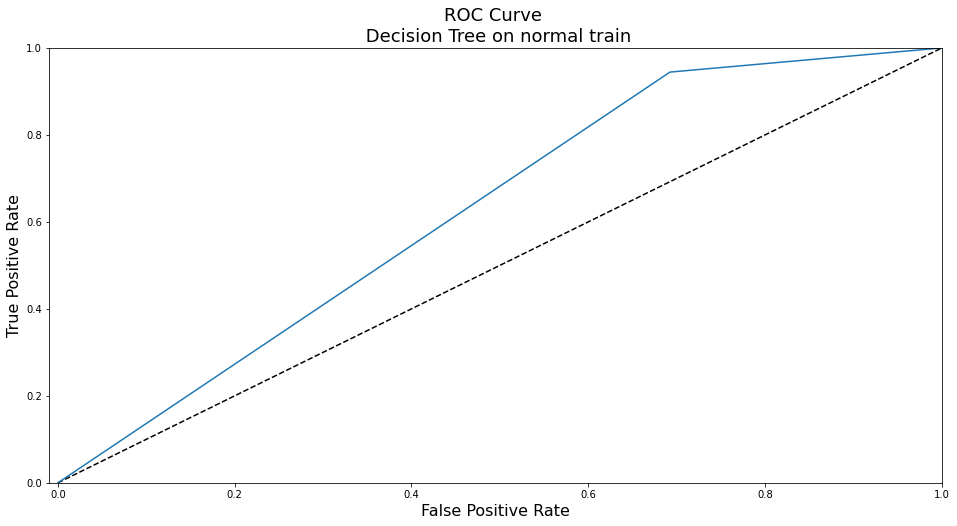

In [109]:
# Generate ROC Curve for model with undersampling
import sklearn.metrics as metrics
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Decision Tree on normal train', fontsize=18)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_under)
plt.plot(fpr, tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, preds_under)))

In [112]:
results_normal = classification_report(y_test, preds_normal, output_dict=True)
results_over = classification_report(y_test, preds_over, output_dict=True)
results_under = classification_report(y_test, preds_under, output_dict=True)

In [117]:
results = {
    'labels':['normal','oversampling','undersampling'],
    'accuracy': [results_normal['accuracy'], results_over['accuracy'], results_under['accuracy']],
    'sensitivity':[results_normal['1']['recall'], results_over['1']['recall'], results_under['1']['recall']],
    'specificity':[results_normal['0']['recall'], results_over['0']['recall'], results_under['0']['recall']],
    'f_score':[results_normal['1']['f1-score'], results_over['1']['f1-score'], results_under['1']['f1-score']],
    'roc_auc':[roc_auc_score(y_test, preds_normal),roc_auc_score(y_test, preds_over),roc_auc_score(y_test, preds_under)]}

<BarContainer object of 3 artists>

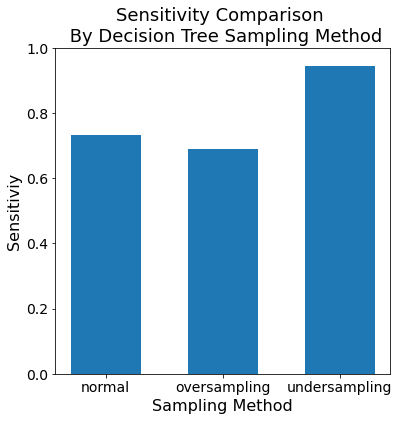

In [145]:
plt.figure(figsize=(6,6))
plt.title('Sensitivity Comparison \n By Decision Tree Sampling Method', fontsize=18)
plt.axis(ymin=0, ymax=1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Sampling Method', fontsize=16)
plt.ylabel('Sensitiviy', fontsize=16)
plt.bar(results['labels'],results['sensitivity'],0.6)